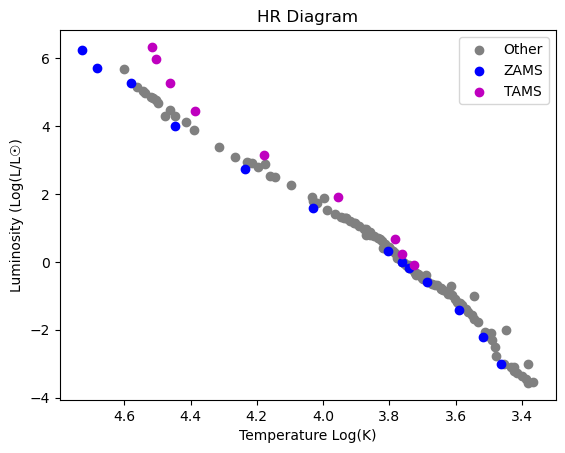

In [43]:
# Andres Martinez
# PHYS50733 Final  
#3.) part 1 
import numpy as np
import matplotlib.pyplot as plt

# Creating an array with 1 row and 6 columns
data = np.empty([1, 6])
with open('main_sequence_stellar_info.txt') as fin:
    for line in fin:
        columns = line.split()
        while(len(columns) < 6):
            columns.append('NULL')
        data = np.vstack([data, columns])
data = np.delete(data, (0, 1), axis=0)

# Extracted data columns
mass = np.array(data[:, 2], dtype=float)
lum = np.array(data[:, 3], dtype=float)
Teff = np.array(data[:, 4], dtype=float)
notes = data[:, 5].tolist()

# Separate the ZAMS and TAMS stars from the rest of the stars 
main = [not z and not t for z, t in zip(zams, tams)]
zams = [note == 'ZAMS' for note in notes]
tams = [note == 'TAMS' for note in notes]


# HR diagram with both axis in log scale
fig, ax = plt.subplots()
ax.scatter(np.log10(Teff[main]), np.log10(lum[main]), c='grey', label='Other')
ax.scatter(np.log10(Teff[zams]), np.log10(lum[zams]), c='b', label='ZAMS')
ax.scatter(np.log10(Teff[tams]), np.log10(lum[tams]), c='m', label='TAMS')
ax.set_title('HR Diagram')
ax.set_xlabel('Temperature Log(K)')
ax.set_ylabel('Luminosity (Log(L/L☉)')
ax.invert_xaxis()
plt.legend()

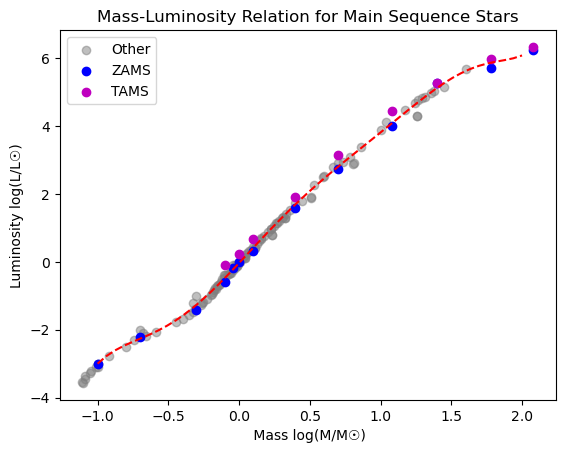

In [39]:
# Andres Martinez
# PHYS50733 Final  
#3.) part 2

# Creating an array with 1 row and 6 columns
data = np.empty([1, 6])
with open('main_sequence_stellar_info.txt') as fin:
    for line in fin:
        columns = line.split()
        while(len(columns) < 6):
            columns.append('NULL')
        data = np.vstack([data, columns])
data = np.delete(data, (0, 1), axis=0)

# Extracted data columns
mass = np.array(data[:, 2], dtype=float)
lum = np.array(data[:, 3], dtype=float)
Teff = np.array(data[:, 4], dtype=float)
notes = data[:, 5].tolist()

# Separate the ZAMS and TAMS stars from the rest of the stars 
main = [not z and not t for z, t in zip(zams, tams)]
zams = [note == 'ZAMS' for note in notes]
tams = [note == 'TAMS' for note in notes]

# Create a log-log plot of Mass vs luminosity
fig, ax = plt.subplots()
ax.scatter(np.log10(mass[main]), np.log10(lum[main]), c='grey', label='Other')
ax.scatter(np.log10(mass[zams]), np.log10(lum[zams]), c='b', label='ZAMS')
ax.scatter(np.log10(mass[tams]), np.log10(lum[tams]), c='m', label='TAMS')

# Fit a polynomial to the data
z = np.polyfit(np.log10(mass), np.log10(lum), deg=8)
p = np.poly1d(z)
xp = np.linspace(-1, 2, 50)
plt.plot(xp, p(xp), 'r--')
plt.xlabel(' Mass log(M/M☉)')
plt.ylabel('Luminosity log(L/L☉)')
plt.title('Mass-Luminosity Relation for Main Sequence Stars')
plt.legend()

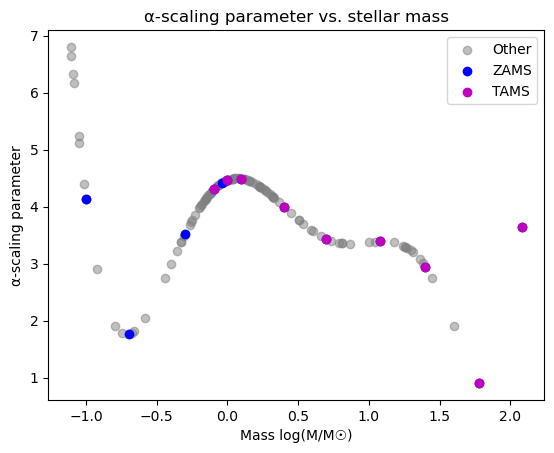

In [40]:
# Andres Martinez
# PHYS50733 Final  
#3.) part 3

# Creating an array with 1 row and 6 columns
data = np.empty([1, 6])

with open('main_sequence_stellar_info.txt') as fin:
    for line in fin:
        columns = line.split()
        while(len(columns) < 6):
            columns.append('NULL')
        data = np.vstack([data, columns])
data = np.delete(data, (0, 1), axis=0)

# Extracted data columns
mass = np.array(data[:, 2], dtype=float)
lum = np.array(data[:, 3], dtype=float)
Teff = np.array(data[:, 4], dtype=float)
notes = data[:, 5].tolist()

# Separate the ZAMS and TAMS stars from the rest
main = [not z and not t for z, t in zip(zams, tams)]
zams = [note == 'ZAMS' for note in notes]
tams = [note == 'TAMS' for note in notes]


# Fit a polynomial to the data
z = np.polyfit(np.log10(mass), np.log10(lum), deg=8)
p = np.poly1d(z)

# Create a plot of log M/Msun on the x-axis and alpha on the y-axis
xp = np.linspace(-1, 20, 50)
# derivative of polynomial
dp = p.deriv()
# evaluate the derivative polynomial at each mass
a = dp(np.log10(mass))  
fig, ax = plt.subplots()
ax.scatter(np.log10(mass)[main], a[main], c='grey', alpha=0.5, label='Other')
ax.scatter(np.log10(mass)[zams], a[zams], c='b', label='ZAMS')
ax.scatter(np.log10(mass)[tams], a[tams], c='m', label='TAMS' )
plt.xlabel('Mass log(M/M☉)')
plt.ylabel('α-scaling parameter')
plt.title('α-scaling parameter vs. stellar mass')
plt.legend()